In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
clicks_df = pd.read_csv('stud_dates_click.csv')
clicks_df

,code_module,code_presentation,id_student,final_result,-25,-24,-23,-22,-21,-20,...,260,261,262,263,264,265,266,267,268,269
0,AAA,2013J,11391,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAA,2013J,28400,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,2013J,30268,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAA,2013J,31604,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,AAA,2013J,32885,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,Fail,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32589,GGG,2014J,2645731,Distinction,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32590,GGG,2014J,2648187,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32591,GGG,2014J,2679821,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
stud_df = pd.read_csv('./data/studentInfo.csv')
stud_df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [4]:
# merge three table for further processing
data = pd.merge(stud_df, clicks_df, on=['code_module', 'code_presentation', 'id_student', 'final_result'], how='inner')
data

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,260,261,262,263,264,265,266,267,268,269
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# change the label of target
data['final_result'] = data['final_result'].map({'Pass':1, 'Distinction':1, 'Withdrawn':0, 'Fail':0})

# split the data into train and test
dataX = data.drop(columns='final_result')
target = data['final_result']
X_train, X_test, y_train, y_test = train_test_split(dataX, target, test_size=0.2, stratify=target)

In [7]:
def prepare_data(X, rule='W', week_no=None):
    
    #clicks data
    cols = [str(i) for i in range(-25, 270)]
    X1 = X[cols]
    X1 = X1.T
    X1.index = pd.date_range(start='1/1/2014', periods=295)
    X1 = X1.resample(rule).sum()
    X1 = X1.T
    if week_no:
        X1 = X1.iloc[:, :week_no]
          
    return X1

In [9]:
# prepare the data
X_train_clicks = prepare_data(X_train)
X_test_clicks = prepare_data(X_test)

# print stastic
print('Train Data:', X_train_clicks.shape)
print('Test Data: ', X_test_clicks.shape)
print('Train target count:', Counter(y_train))
print('Test target count:', Counter(y_test))

Train Data: (26074, 43)
Test Data:  (6519, 43)
Train target count: Counter({0: 13766, 1: 12308})
Test target count: Counter({0: 3442, 1: 3077})


In [15]:
# chnage the data into 3-d
X_train_clicks = X_train_clicks.to_numpy().reshape(X_train_clicks.shape[0], X_train_clicks.shape[1], 1)
X_test_clicks = X_test_clicks.to_numpy().reshape(X_test_clicks.shape[0], X_test_clicks.shape[1], 1)

In [16]:
from tensorflow.keras.layers import Dense, Input, Conv1D, AveragePooling1D, Flatten, Add, Multiply, Softmax, LSTM
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model

In [17]:
def visualize_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['Train', 'Validation'])
    plt.show()

# CNN base model

In [18]:
# define model
def define_model():
    clicks_cnn = Sequential()
    clicks_cnn.add(Input(shape=(X_train_clicks.shape[1], 1)))
    clicks_cnn.add(Conv1D(32, kernel_size=2, activation='relu'))
    clicks_cnn.add(layers.BatchNormalization())
    clicks_cnn.add(AveragePooling1D(2))
    clicks_cnn.add(Conv1D(64, kernel_size=2, activation='relu'))
    clicks_cnn.add(layers.BatchNormalization())
    clicks_cnn.add(AveragePooling1D(2))
#     clicks_cnn.add(Conv1D(128, kernel_size=2, activation='relu'))
#     clicks_cnn.add(layers.BatchNormalization())
#     clicks_cnn.add(AveragePooling1D(2))
    clicks_cnn.add(Flatten())
    clicks_cnn.add(Dense(128,  activation='relu'))
    clicks_cnn.add(Dense(64,  activation='relu'))
    clicks_cnn.add(Dense(32,  activation='relu'))
    clicks_cnn.add(Dense(1,  activation='sigmoid'))

    # compile the model
    clicks_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return clicks_cnn

Epoch 1/20
734/734 - 4s - loss: 0.2349 - accuracy: 0.9139 - val_loss: 0.2074 - val_accuracy: 0.9222
Epoch 2/20
734/734 - 4s - loss: 0.2127 - accuracy: 0.9207 - val_loss: 0.2123 - val_accuracy: 0.9202
Epoch 3/20
734/734 - 3s - loss: 0.2088 - accuracy: 0.9228 - val_loss: 0.2191 - val_accuracy: 0.9145
Epoch 4/20
734/734 - 3s - loss: 0.2041 - accuracy: 0.9241 - val_loss: 0.3136 - val_accuracy: 0.9057
Epoch 5/20
734/734 - 4s - loss: 0.1982 - accuracy: 0.9261 - val_loss: 0.2027 - val_accuracy: 0.9233
Epoch 6/20
734/734 - 3s - loss: 0.1960 - accuracy: 0.9259 - val_loss: 0.2281 - val_accuracy: 0.9160
Epoch 7/20
734/734 - 3s - loss: 0.1892 - accuracy: 0.9295 - val_loss: 0.2167 - val_accuracy: 0.9195
Epoch 8/20
734/734 - 3s - loss: 0.1815 - accuracy: 0.9316 - val_loss: 0.2516 - val_accuracy: 0.9130
Epoch 9/20
734/734 - 4s - loss: 0.1757 - accuracy: 0.9335 - val_loss: 0.2300 - val_accuracy: 0.9118
Epoch 10/20
734/734 - 3s - loss: 0.1671 - accuracy: 0.9360 - val_loss: 0.2247 - val_accuracy: 0.9191

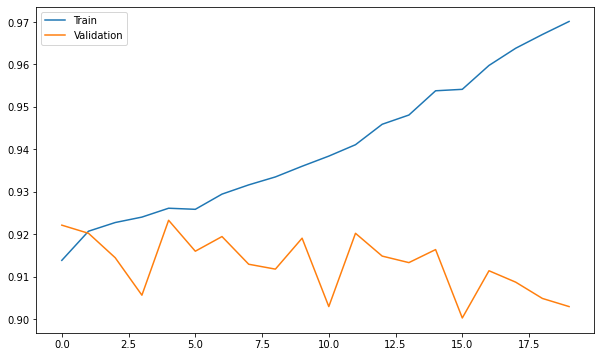

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

path = 'best_model.h5'
callbacks = ModelCheckpoint(path, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

model = define_model()
hist = model.fit(X_train_clicks, y_train, validation_split=0.1, epochs=20, batch_size=32, verbose=2, callbacks=[callbacks])
visualize_loss(hist)

In [20]:
# predict
predict = model.predict(X_test_clicks)
predict = np.where(predict>0.5, 1, 0)
print('Accuracy: ', accuracy_score(predict, y_test))
print(classification_report(predict, y_test))

Accuracy:  0.902899217671422
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      3333
           1       0.91      0.88      0.90      3186

    accuracy                           0.90      6519
   macro avg       0.90      0.90      0.90      6519
weighted avg       0.90      0.90      0.90      6519



In [23]:
# load best model
model.load_weights(path)
predict = model.predict(X_test_clicks)
predict2 = np.where(predict>0.5, 1, 0)
print('Accuracy: ', accuracy_score(predict2, y_test))
print(classification_report(predict2, y_test))

Accuracy:  0.9243749041263998
              precision    recall  f1-score   support

           0       0.88      0.98      0.92      3091
           1       0.98      0.88      0.92      3428

    accuracy                           0.92      6519
   macro avg       0.93      0.93      0.92      6519
weighted avg       0.93      0.92      0.92      6519



# Lets do the early prediction based on every months

In [24]:
# week vs accuracy
accuracy = {}

for i in range(12, 41, 4):
    # prepare the data
    X_train_clicks = prepare_data(X_train, week_no=i)
    X_test_clicks = prepare_data(X_test, week_no=i)
    
    # change dimension
    X_train_clicks = X_train_clicks.to_numpy().reshape(X_train_clicks.shape[0], X_train_clicks.shape[1], 1)
    X_test_clicks = X_test_clicks.to_numpy().reshape(X_test_clicks.shape[0], X_test_clicks.shape[1], 1)
    
    # call model
    model = define_model()
    
    # save model based on validation accuracy
    path = 'best_model.h5'
    callbacks = ModelCheckpoint(path, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)
    
    # train the model
    model.fit(X_train_clicks, y_train, validation_split=0.1, epochs=20, batch_size=32, verbose=0, callbacks=[callbacks])
    
    # load the model weight and Test 
    model.load_weights(path)
    predict = model.predict(X_test_clicks)
    predict = np.where(predict>0.5, 1, 0)
    accuracy[i] = accuracy_score(predict, y_test)
    


([<matplotlib.axis.XTick at 0x7f7ee4573fd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

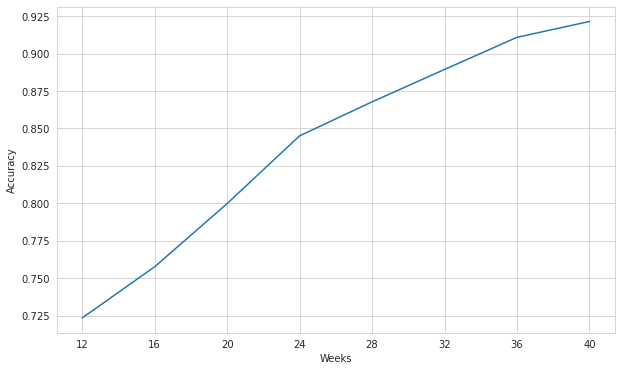

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(accuracy.keys(), accuracy.values())
plt.xlabel('Weeks')
plt.ylabel('Accuracy')
plt.xticks(list(accuracy.keys()))